In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
sns.set(style='darkgrid')
%matplotlib inline
# 한글 처리를 위한 폰트 설정
font_name= font_manager.FontProperties(fname='c:/windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
# 그림 크기 설정
plt.rcParams['figure.figsize']=(12,9)
# 마이너스 표기
plt.rcParams['axes.unicode_minus']=False
# 타이타닉 데이터 로드
titanic= sns.load_dataset('titanic')
# Tips 데이터 로드
tips=sns.load_dataset('tips')

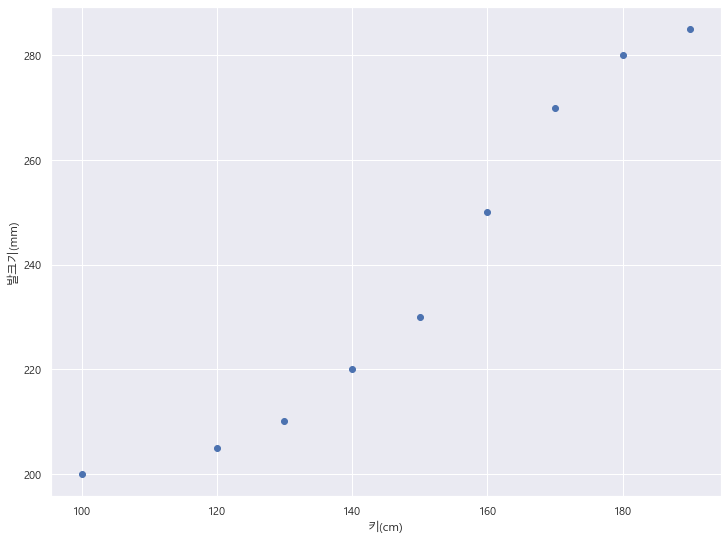

In [19]:
height = [100,120,130,140,150,160,170,180,190]
foot_size=[200,205,210,220,230,250,270,280,285]

plt.scatter(height,foot_size)
plt.xlabel('키(cm)')
plt.ylabel('발크기(mm)')
plt.show()

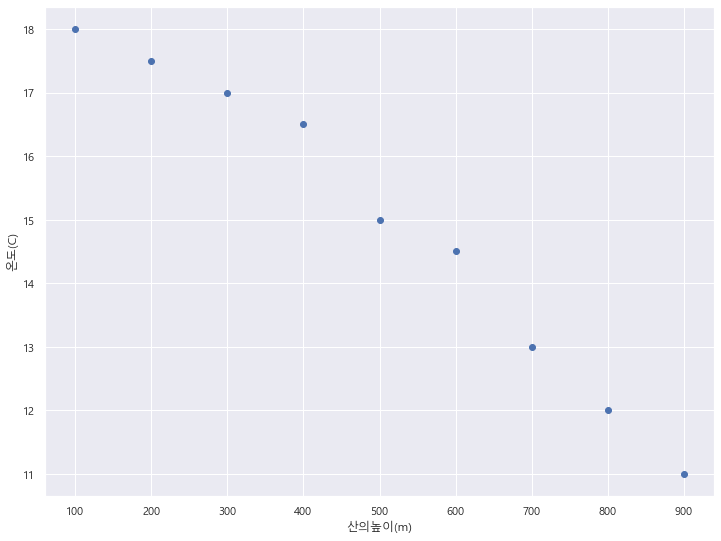

In [8]:
h=[100,200,300,400,500,600,700,800,900]
t=[18.0,17.5,17,16.5,15,14.5,13,12,11]

plt.scatter(h,t)
plt.xlabel('산의높이(m)')
plt.ylabel('온도(C)')
plt.show()

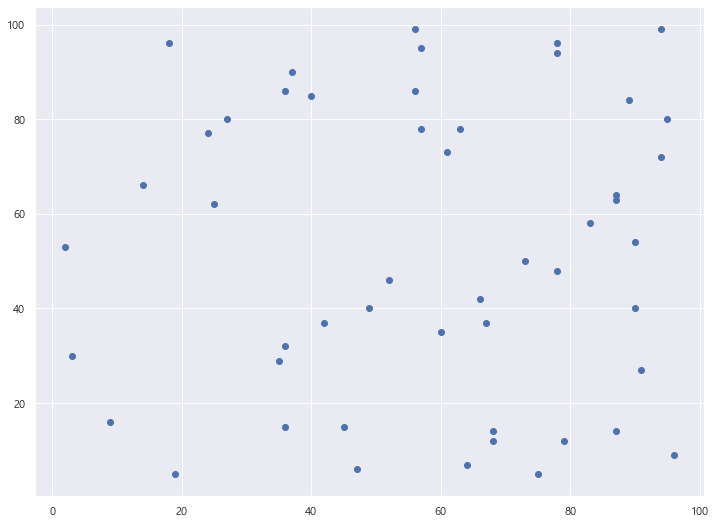

In [16]:
#random.randint(start,end,size)
random_x=np.random.randint(0,100,50)
random_y=np.random.randint(0,100,50)
plt.scatter(random_x, random_y)
plt.show()

0.966126323516351


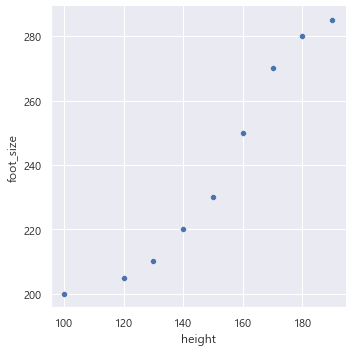

In [33]:
df=pd.DataFrame({'height':height, 'foot_size':foot_size})
sns.relplot(x='height',y='foot_size', data=df)

print(df.height.corr(df.foot_size))

0.6757341092113646


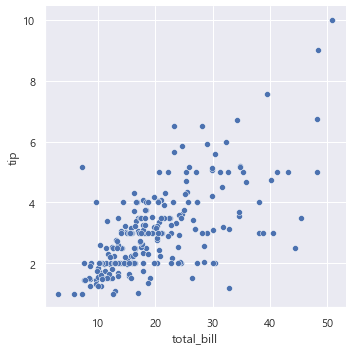

In [4]:
sns.relplot(x='total_bill', y='tip', data=tips)
print(tips.total_bill.corr(tips.tip))

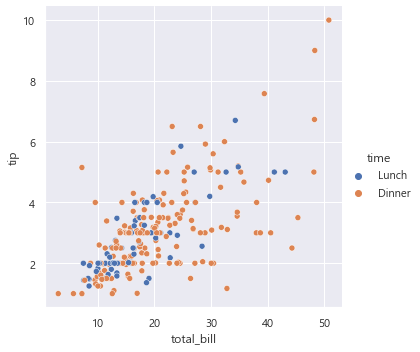

In [5]:
sns.relplot(x='total_bill', y='tip', data=tips, hue='time')

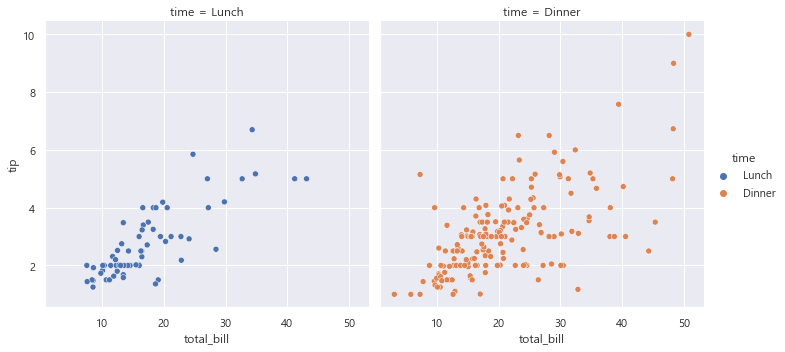

In [6]:
sns.relplot(x='total_bill', y='tip', col='time',data=tips, hue='time')

In [11]:
import math
def correlation(x,y):
    n=len(x)
    vals=range(n)
    x_sum = 0.0
    y_sum=0.0
    x_sum_pow=0.0
    y_sum_pow=0.0
    mul_xy_sum=0.0
    
    for i in vals:
        mul_xy_sum = mul_xy_sum+float(x[i])*float(y[i])
        x_sum = x_sum+float(x[i])
        y_sum = y_sum+float(y[i])
        x_sum_pow = x_sum_pow+pow(float(x[i]),2)
        y_sum_pow = y_sum_pow+pow(float(y[i]),2)
    try:
        r=((n*mul_xy_sum)-(x_sum*y_sum)) / math.sqrt( ((n*x_sum_pow)-pow(x_sum,2)) * ((n*y_sum_pow)-pow(y_sum,2)))
    except:
        print('error')
        r=0.0
    return r

In [12]:
print('상관분석: ', correlation(h,t))

상관분석:  -0.9879199164035135


In [14]:
df1= pd.DataFrame({'h':h, 't':t})
print(df1.h.corr(df1.t))

-0.9879199164035133


In [17]:
df2=pd.DataFrame({'x':random_x,'y':random_y})
print(df2.x.corr(df2.y))

0.0331903019138999


In [25]:
list = [height,foot_size]
df3=pd.DataFrame(list).T
print(df3)
corr=df3.corr(method='pearson') #상관관계를 선형으로 표기
print(corr)

[[100, 120, 130, 140, 150, 160, 170, 180, 190], [200, 205, 210, 220, 230, 250, 270, 280, 285]]
     0    1
0  100  200
1  120  205
2  130  210
3  140  220
4  150  230
5  160  250
6  170  270
7  180  280
8  190  285
          0         1
0  1.000000  0.966126
1  0.966126  1.000000


In [29]:
weight = [25,30,38,35,40,45,55,68,70]
list = [height, foot_size, weight]
df4=pd.DataFrame(list).T
df4.columns=['height', 'foot_size', 'weight']
print(df4)
corr=df4.corr(method='pearson')
corr=df4.corr()
print(corr)

   height  foot_size  weight
0     100        200      25
1     120        205      30
2     130        210      38
3     140        220      35
4     150        230      40
5     160        250      45
6     170        270      55
7     180        280      68
8     190        285      70
             height  foot_size    weight
height     1.000000   0.966126  0.952271
foot_size  0.966126   1.000000  0.969807
weight     0.952271   0.969807  1.000000


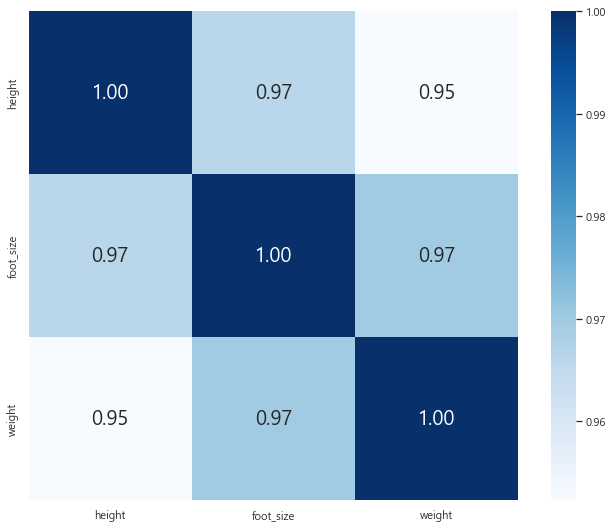

In [30]:
df_heatmap = sns.heatmap(corr, #상관계수 값
                         cbar=True, #사이드바 표시
                         annot=True, #실제 값 화면 표시 여부
                         annot_kws={'size':20}, #글자 크기
                         fmt='.2f', #소수점 자리수 지정
                         square=True, #정사각형으로 표시여부
                         cmap='Blues') #색상 지정, Reds, Greens, Blues

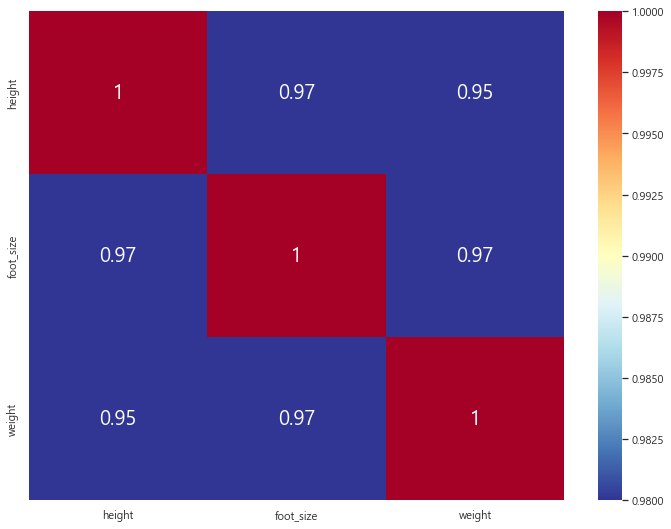

In [44]:
df_heatmap = sns.heatmap(corr,
                         cbar=True,
                         annot=True,
                         annot_kws={'size':20},
                         cmap='RdYlBu_r', # red, yellow, blue 색상으로 표시
                         vmin=0.98, vmax=1) #t색상 표시 최대값과 최소값

In [31]:
tips_corr=tips.corr(method='pearson')
print(tips_corr)

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


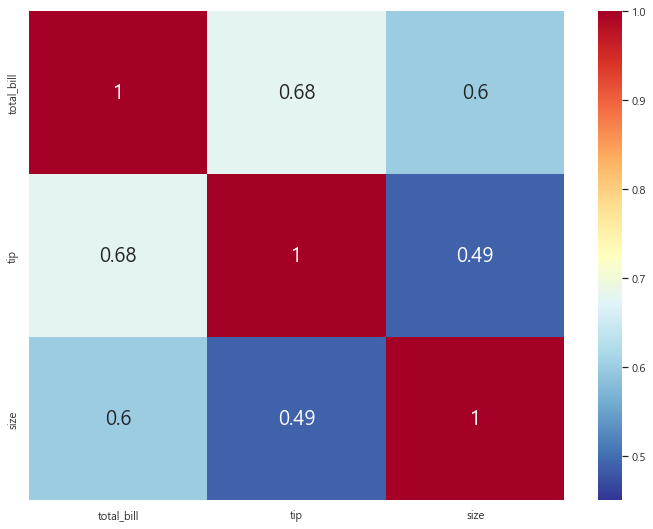

In [32]:
df_heatmap = sns.heatmap(tips_corr,
                         cbar=True,
                         annot=True,
                         annot_kws={'size':20},
                         cmap='RdYlBu_r',
                         vmin=0.45, vmax=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_23260\54293576.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.ones_like(corr,dtype=np.bool)


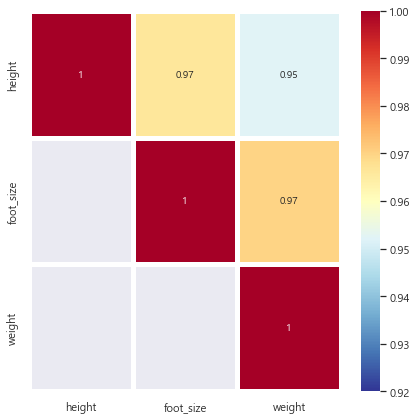

In [61]:
fig, ax = plt.subplots(figsize=(7,7))
mask = np.ones_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=False
# print(np.triu_indices_from(mask))
df_heatmap = sns.heatmap(
    corr,
    cbar_kws={'shrink':1}, #컬러바 크기 절반으로 줄이기
    annot=True,
    mask=mask, #표시하지 않을 마스크 부분 지정
    linewidth=5, #경계면 선으로 구분하기
    cmap='RdYlBu_r', #RGB 색상 표현
    vmin=0.92, vmax=1)

In [62]:
titanic.to_csv('data/titanic.csv',index=False)

In [66]:
print(titanic[:5])
print(titanic.info())
print(titanic.isnull().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [67]:
titanic['age']=titanic['age'].fillna(titanic['age'].median())

In [68]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [74]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [69]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [76]:
titanic['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [70]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [72]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [73]:
titanic['deck'] = titanic['deck'].fillna('C')

In [77]:
print(titanic.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [81]:
corr = titanic.corr()

C:\Users\admin\AppData\Local\Temp\ipykernel_23260\2594513084.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.ones_like(corr,dtype=np.bool)


<AxesSubplot:>

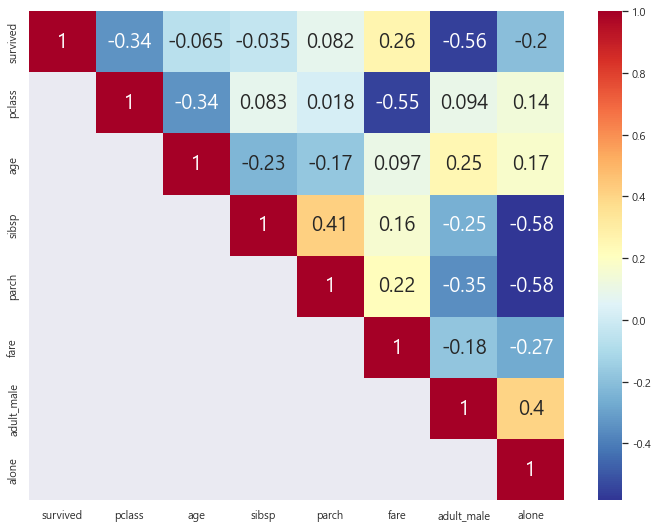

In [89]:
mask = np.ones_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=False

sns.heatmap(corr,
            cbar=True,
            annot=True,
            annot_kws={'size':20},
            mask=mask,
            cmap='RdYlBu_r')